In [2]:
# Capstone A Project - Spring 2020
# Kaggle Attrition data - Exploratory Data Analysis Python Code 
# Reference URL:  https://www.kaggle.com/abhishektibrewal/hr-employee-attrition

# data transformation
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime

# data plotting
import seaborn as sns
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# classification & correlation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics as mt
#import xgboost as xgb




In [3]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf



print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Tensor Flow Version: 2.0.0
Keras Version: 2.2.4-tf

Python 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Pandas 0.24.2
Scikit-Learn 0.20.3
GPU is NOT AVAILABLE


In [5]:
## Importing data from an Excel file:
## Prior to loading the file, convert it to csv in Excel 
## Setting datatypes prior to load

## updated data types to match types in IBM's as listed here:  
## http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html

datatypes = {
"Age": "int",
"Attrition": "category",
"BusinessTravel": "category",
"DailyRate": "int",
"Department": "category",
"DistanceFromHome": "int",
"Education": "int", ## changed to int
"EducationField": "category",
"EmployeeCount": "int",
"EmployeeNumber": "int",
"EnvironmentSatisfaction": "int", ## changed
"Gender": "category",
"HourlyRate": "int",
"JobInvolvement": "int", ## changed
"JobLevel": "int", #changed
"JobRole": "category",
"JobSatisfaction": "int", ## changed
"MaritalStatus": "category",
"MonthlyIncome": "int",
"MonthlyRate": "int",
"NumCompaniesWorked": "int",
"Over18": "category",
"OverTime": "category",
"PercentSalaryHike": "float",
"PerformanceRating": "int", ## changed
"RelationshipSatisfaction": "int", ## changed
"StandardHours": "int",
"StockOptionLevel": "int",  ## changed
"TotalWorkingYears": "int",
"TrainingTimesLastYear": "int",
"WorkLifeBalance": "int", #changed
"YearsAtCompany": "int",
"YearsInCurrentRole": "int",
"YearsSinceLastPromotion": "int",
"YearsWithCurrManager": "int"
}

df = pd.read_csv('https://raw.githubusercontent.com/skhayden/SMU-Capstone-Age-Bias-in-Predictive-Modeling-/master/WA_Fn-UseC_-HR-Employee-Attrition.csv',low_memory=False)


# Verifying the upload of the data looking at the first 5 rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Verifying the upload of the data looking at the last 5 rows

df.tail()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
# Verifying the dimensions of the data set - (rows, cols)

df.shape

(1470, 35)

In [6]:
# Check what data types the features are

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# Retrieve simple statistics from the data set

df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
# Exploring our Age feature

df.Age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [10]:
# Exploring our Age feature

df.Age.value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

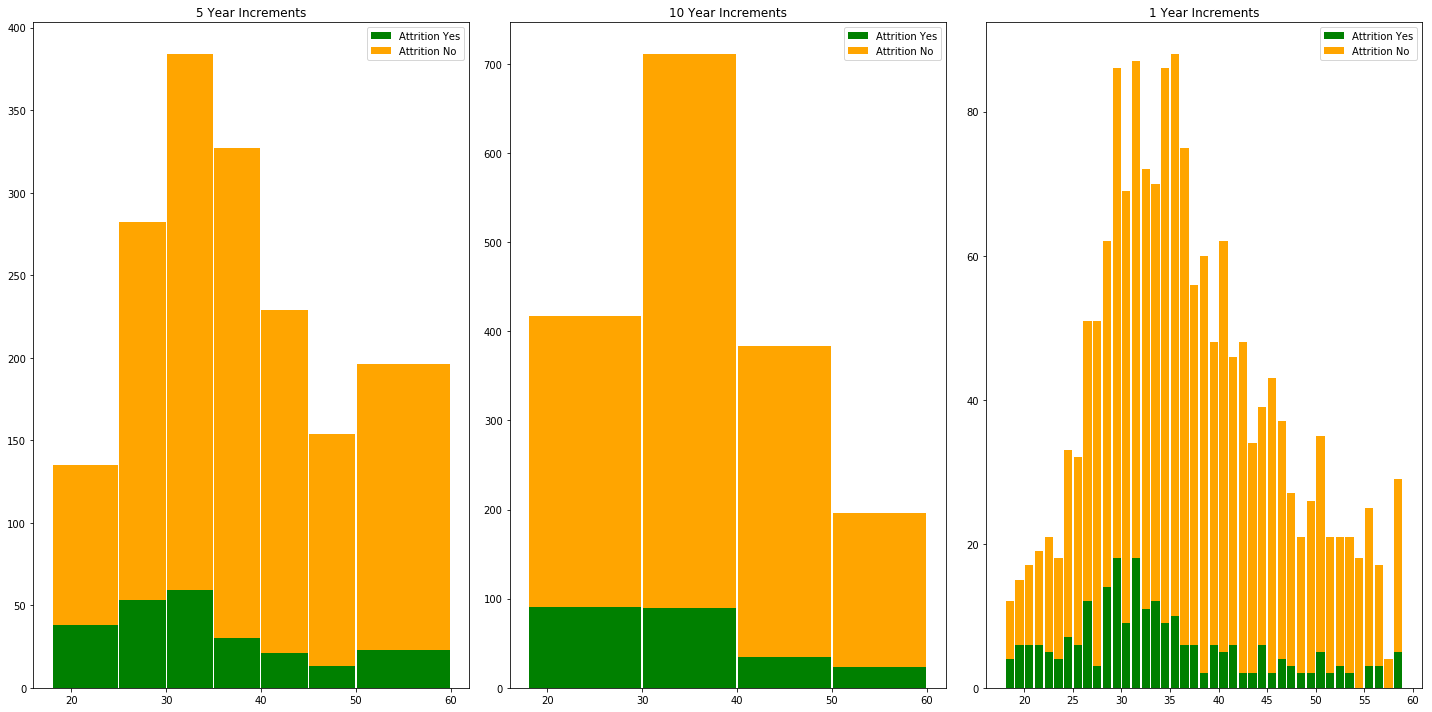

In [11]:
#decade increments
bin_labels10 = ['<=30', '>30 & <=40', '>40 & <=50', '>50']
bins10 = [min(df['Age']), 30, 40, 50, max(df['Age'])]
df['Age_group_Decade'] = pd.cut(df['Age'], bins=bins10, labels=bin_labels10)


#half decade increments
bin_labels5 = ['<=25', '>25 & <=30','>30 & <=35','>35 & <=40','>40 & <=45','>45 & <=50','>50']
bins5 = [min(df['Age']), 25, 30, 35, 40, 45, 50, max(df['Age'])]
df['Age_group_half_Decade'] = pd.cut(df['Age'], bins=bins5, labels=bin_labels5)

#year increments
bin_labels1 = list(range(min(df['Age']),max(df['Age'])))
bins1 = list(range(min(df['Age']),max(df['Age'])))
df['Age_group_Year'] = pd.cut(df['Age'], bins=bins1, labels=bin_labels1[0:len(bin_labels1)-1])



fig, ((ax0, ax1,ax2)) = plt.subplots( ncols=3,figsize=(20, 10))

ax0.hist([df['Age'].loc[df['Attrition']=='Yes'],
          df['Age']],bins=bins5, stacked=True,color=['green', 'orange'], 
          rwidth=0.98,label=['Attrition Yes', 'Attrition No'])
ax0.set_title('5 Year Increments')
ax0.legend(prop={'size': 10})

ax1.hist([df['Age'].loc[df['Attrition']=='Yes'],
          df['Age']],bins=bins10, stacked=True,color=['green', 'orange'], 
          rwidth=0.98,label=['Attrition Yes', 'Attrition No'])
ax1.set_title('10 Year Increments')
ax1.legend(prop={'size': 10})

ax2.hist([df['Age'].loc[df['Attrition']=='Yes'],
          df['Age']],bins=bins1, stacked=True,color=['green', 'orange'], 
          rwidth=0.85,label=['Attrition Yes', 'Attrition No'])
ax2.set_title('1 Year Increments')
ax2.legend(prop={'size': 10})

fig.tight_layout()
plt.show()


In [12]:
idx = pd.IndexSlice
#10 year perc
Agedf10=df.groupby(['Age_group_Decade', 'Attrition']).agg({'Attrition': 'count'})
Age10_pcts = Agedf10.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
#5 year perc
Agedf5=df.groupby(['Age_group_half_Decade', 'Attrition']).agg({'Attrition': 'count'})
Age5_pcts = Agedf5.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

#1 year perc
Agedf1=df.groupby(['Age_group_Year', 'Attrition']).agg({'Attrition': 'count'})
Age1_pcts = Agedf1.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))






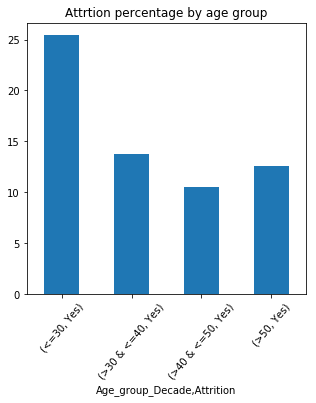

In [13]:

Age10_pcts.loc[idx[:, ['Yes']], idx['Attrition']].plot.bar(figsize=(5, 5),layout=(2, 2),
                title='Attrtion percentage by age group',rot=50)


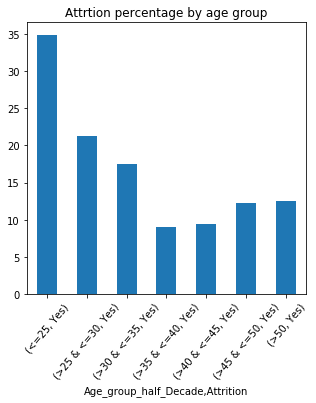

In [14]:
Age5_pcts.loc[idx[:, ['Yes']], idx['Attrition']].plot.bar(figsize=(5, 5),layout=(2, 2),
                title='Attrtion percentage by age group',rot=50)


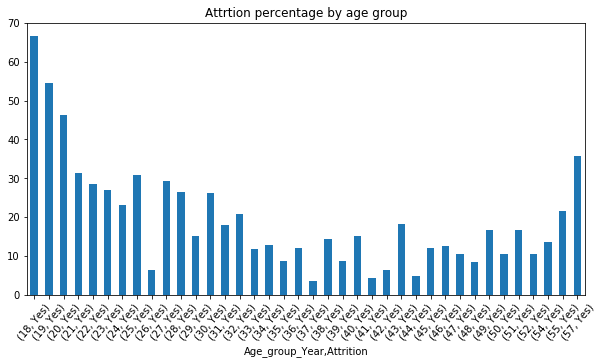

In [15]:
Age1_pcts.loc[idx[:, ['Yes']], idx['Attrition']].plot.bar(figsize=(10, 5),
                    layout=(2, 2),title='Attrtion percentage by age group',
                    rot=50)


In [16]:
## In order to get familiarized with data set, we are displaying categorical frequency groupings for:
## categorical features 
## some numerical features with levels 
## target label (Y - Attrition)

##### Categorical Features   #####

## Attrition Frequency
df_byAttrition = df.groupby(['Attrition'])
print(df_byAttrition.Attrition.count())
print(" ")
print(" ")

## BusinessTravel Frequency
df_byBusinessTravel = df.groupby(['BusinessTravel'])
print(df_byBusinessTravel.BusinessTravel.count())
print(" ")
print(" ")

## Department Frequency
df_byDepartment = df.groupby(['Department'])
print(df_byDepartment.Department.count())
print(" ")
print(" ")

## Education Field Frequency Table
df_byEducationField = df.groupby(['EducationField'])
print(df_byEducationField .EducationField.count())
print(" ")
print(" ")

## Gender Frequency Table
df_byGender = df.groupby(['Gender'])
print(df_byGender.Gender.count())
print(" ")
print(" ")

## JobRole Frequency Table
df_byJobRole = df.groupby(['JobRole'])
print(df_byJobRole.JobRole.count())
print(" ")
print(" ")

## MaritalStatus  Frequency Table
df_byMaritalStatus  = df.groupby(['MaritalStatus'])
print(df_byMaritalStatus.MaritalStatus.count())
print(" ")
print(" ")

## Over18  Frequency Table
df_byOver18  = df.groupby(['Over18'])
print(df_byOver18.Over18.count())
print(" ")
print(" ")

## OverTime  Frequency Table
df_byOverTime  = df.groupby(['OverTime'])
print(df_byOverTime.OverTime.count())
print(" ")
print(" ")





#### Numerical features with levels  ####
print("Numerical features with levels")
print(" ")
print(" ")



## Education Frequency
df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

## df_byEnvironmentSatisfaction Frequency Table
df_byEnvironmentSatisfaction = df.groupby(['EnvironmentSatisfaction'])
print(df_byEnvironmentSatisfaction.EnvironmentSatisfaction.count())
print(" ")
print(" ")

## JobInvolvement Frequency Table
df_byJobInvolvement = df.groupby(['JobInvolvement'])
print(df_byJobInvolvement.JobInvolvement.count())
print(" ")
print(" ")

## JobLevel Frequency Table
df_byJobLevel = df.groupby(['JobLevel'])
print(df_byJobLevel.JobLevel.count())
print(" ")
print(" ")

## JobSatisfaction Frequency Table
df_byJobSatisfaction = df.groupby(['JobSatisfaction'])
print(df_byJobSatisfaction.JobSatisfaction.count())
print(" ")
print(" ")

## PerformanceRating  Frequency Table
df_byPerformanceRating  = df.groupby(['PerformanceRating'])
print(df_byPerformanceRating.PerformanceRating.count())
print(" ")
print(" ")

## RelationshipSatisfaction  Frequency Table
df_byRelationshipSatisfaction  = df.groupby(['RelationshipSatisfaction'])
print(df_byRelationshipSatisfaction.RelationshipSatisfaction.count())
print(" ")
print(" ")

## StockOptionLevel  Frequency Table
df_byStockOptionLevel  = df.groupby(['StockOptionLevel'])
print(df_byStockOptionLevel.StockOptionLevel.count())
print(" ")
print(" ")

## WorkLifeBalance  Frequency Table
df_byWorkLifeBalance  = df.groupby(['WorkLifeBalance'])
print(df_byWorkLifeBalance.WorkLifeBalance.count())
print(" ")
print(" ")



Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
 
 
BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: BusinessTravel, dtype: int64
 
 
Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Department, dtype: int64
 
 
EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
Name: EducationField, dtype: int64
 
 
Gender
Female    588
Male      882
Name: Gender, dtype: int64
 
 
JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
Name: JobRole, dtype: int64
 
 
MaritalStatus
Divorced    327
Married     673
Single      470
N

In [17]:
## Reducing levels in Education feature from 5(five) to 4 (four) levels

df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

i = 0
while (i < df.Education.count()):
   ##print ("The Education value is:", df.Education[i])
   if df.Education[i] == 5:
     df.Education[i] = 4
   i = i + 1


df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

Education
1    170
2    282
3    572
4    398
5     48
Name: Education, dtype: int64
 
 


C:\Users\solan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Education
1    170
2    282
3    572
4    446
Name: Education, dtype: int64
 
 


Create the target with a binary flag. 1 indicates that they left, and 0 indicates they did not. 

In [18]:
df['OverTime']

0       Yes
1        No
2       Yes
3       Yes
4        No
5        No
6       Yes
7        No
8        No
9        No
10       No
11      Yes
12       No
13       No
14      Yes
15       No
16      Yes
17      Yes
18       No
19      Yes
20       No
21       No
22       No
23       No
24       No
25       No
26      Yes
27       No
28       No
29       No
       ... 
1440     No
1441     No
1442    Yes
1443     No
1444     No
1445     No
1446     No
1447     No
1448     No
1449     No
1450    Yes
1451     No
1452     No
1453     No
1454     No
1455     No
1456    Yes
1457     No
1458     No
1459    Yes
1460     No
1461    Yes
1462     No
1463     No
1464     No
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object

In [19]:
#OneHotdf.columns
#list(df.select_dtypes(exclude = 'int64').columns)
#Categorical_Columns= list(df.select_dtypes(exclude = 'int64').columns)
#Categorical_Columns=Categorical_Columns[0:len(Categorical_Columns)-3]
#Categorical_Columns
#Categorical_Columns[0:len(Categorical_Columns)-3]

In [19]:
####### Steven One hot encouding 

exclude=df.select_dtypes('int64').columns

#get columns to onehot encoude
Numeric_Columns=list(df.select_dtypes('int64').columns)
Categorical_Columns= list(df.select_dtypes(exclude = 'int64').columns)

               
########
#onehot
OneHotdf = pd.get_dummies(df[Categorical_Columns].drop(['Attrition',
                                'Age_group_Decade','Age_group_half_Decade',
                                'Age_group_Year'],axis=1))

#remove binary varible that is duplicated
OneHotdf = OneHotdf.drop(['OverTime_No','Gender_Male'],axis=1)

#df=df.drop(Categorical_Columns,axis=1)
df = pd.concat([df,OneHotdf], axis=1)


#create target 
df['Target_Attrition_Flag'] = np.where(df['Attrition']=='Yes', 1, 0)


In [23]:
## Preprocessing, Label Encoding Attrition, the Target Label, and non-numerical value features to add to correlation matrix and
## AttritionOne will be used as the Target label in  XGBoster classifier


le = preprocessing.LabelEncoder()

AttritionOne       = le.fit_transform(df.Attrition)
BusinessTravelOne  = le.fit_transform(df.BusinessTravel)
DepartmentOne      = le.fit_transform(df.Department)
EducationFieldOne  = le.fit_transform(df.EducationField)
GenderOne          = le.fit_transform(df.Gender)
JobRoleOne         = le.fit_transform(df.JobRole)
MaritalStatusOne   = le.fit_transform(df.MaritalStatus)
Over18One          = le.fit_transform(df.Over18)
OverTimeOne        = le.fit_transform(df.OverTime)



df2 = pd.DataFrame({'AttritionOne':AttritionOne.tolist(),
                    'BusinessTravelOne':BusinessTravelOne.tolist(),
                    'DepartmentOne':DepartmentOne.tolist(),
                    'EducationFieldOne':EducationFieldOne.tolist(),
                    'GenderOne':GenderOne.tolist(),
                    'JobRoleOne':JobRoleOne.tolist(),
                    'MaritalStatusOne':MaritalStatusOne.tolist(),
                    'Over18One':Over18One.tolist(),
                    'OverTimeOne':OverTimeOne.tolist()
                   })

df3 = pd.concat([df, df2], axis=1)

## print(df2.AttritionOne)




In [24]:
df2.AttritionOne

0       1
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      1
27      0
28      0
29      0
       ..
1440    0
1441    0
1442    1
1443    0
1444    1
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    1
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
1460    0
1461    1
1462    0
1463    0
1464    0
1465    0
1466    0
1467    0
1468    0
1469    0
Name: AttritionOne, Length: 1470, dtype: int64

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 75 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null object
BusinessTravel                       1470 non-null object
DailyRate                            1470 non-null int64
Department                           1470 non-null object
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EducationField                       1470 non-null object
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
Gender                               1470 non-null object
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobRole                          

In [26]:
# Let's explore correlations between features

corr = df3.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Target_Attrition_Flag,AttritionOne,BusinessTravelOne,DepartmentOne,EducationFieldOne,GenderOne,JobRoleOne,MaritalStatusOne,Over18One,OverTimeOne
Age,1.000000,0.010661,-0.001686,0.208334,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,-0.159205,-0.159205,0.024751,-0.031882,-0.040873,-0.036311,-0.122427,-0.095029,NaN,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016309,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,-0.056652,-0.056652,-0.004086,0.007109,0.037709,-0.011716,-0.009472,-0.069586,NaN,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.016755,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.077924,0.077924,-0.024469,0.017225,0.002013,-0.001851,-0.001015,-0.014437,NaN,0.025514
Education,0.208334,-0.016309,0.016755,1.000000,NaN,0.044472,-0.026258,0.013469,0.039844,0.093198,...,-0.027852,-0.027852,0.002018,0.009100,-0.038108,-0.013438,0.004182,0.002995,NaN,-0.022067
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.044472,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.010577,-0.010577,-0.015578,-0.010895,-0.002516,0.022556,-0.010336,-0.008155,NaN,-0.024037
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.026258,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.103369,-0.103369,0.004174,-0.019395,0.043163,0.000508,-0.017321,-0.003593,NaN,0.070132
HourlyRate,0.024287,0.023381,0.031131,0.013469,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.006846,-0.006846,0.026528,-0.004144,-0.021941,-0.000478,-0.018861,-0.017861,NaN,-0.007782
JobInvolvement,0.029820,0.046135,0.008783,0.039844,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,-0.130016,-0.130016,0.039062,-0.024586,-0.002655,0.017960,0.006616,-0.038497,NaN,-0.003507
JobLevel,0.509604,0.002966,0.005303,0.093198,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,-0.169105,-0.169105,0.019311,0.101963,-0.044933,-0.039403,-0.085457,-0.076769,NaN,0.000544


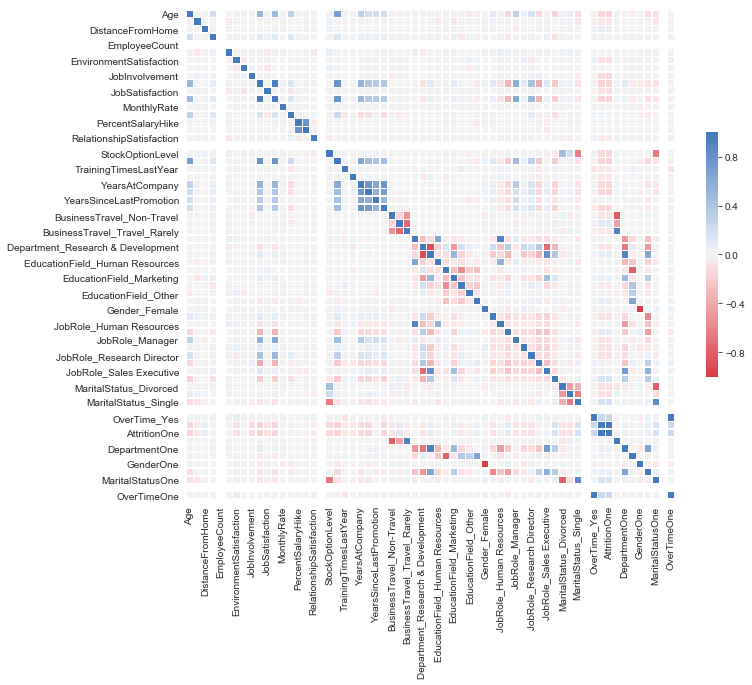

In [27]:
# Mapping feature correlation with a Seaborn heatmap  
# Referenced tutorial:  https://riptutorial.com/seaborn/example/31922/basic-correlation-plot

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, 
        cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, 
        center=0,
        vmin=-1)

Create group attribute for age



df.loc[df['Age'] < 20, 'Age_Group'] = '<20'
df.loc[(df['Age'] >=20 ) & (df['Age'] < 30), 'Age_Group'] = '>=20 & <30'
df.loc[(df['Age'] >=30 ) & (df['Age'] < 40), 'Age_Group'] = '>=30 & <40'
df.loc[(df['Age'] >=40 ) & (df['Age'] < 50), 'Age_Group'] = '>=40 & <50'
df.loc[(df['Age'] >=50 ), 'Age_Group'] = '>=50'


#### Splitting Data and Training Model

Create training and testing data set. This is also where we included and excluded "**Age**"

In [28]:
#drop Categrical columns that have dummie columns
df=df.drop(Categorical_Columns[:-3],axis=1)
#remove vars from trainning either for bias or target value
# This is where you remove "Age" by including in the line below.
Columns_to_drop_for_Training=['Target_Attrition_Flag','Age_group_Year', 'Age_group_Decade','Age_group_half_Decade','Age']

# Split into train/test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(Columns_to_drop_for_Training,axis=1), df['Target_Attrition_Flag'], test_size=0.25)	


### Accuracy of model

In [29]:
import tensorflow as tf
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
#tf.random.set_seed(seed_value)
# for later versions: 
tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
#session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
#sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
#K.set_session(sess)
# for later versions:
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


Using TensorFlow backend.


In [41]:




from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from keras import optimizers




# Build the neural network
##model = Sequential()
##model.add(Dense(25, input_dim=X_train.shape[1], activation='relu')) # Hidden 1
##model.add(Dense(10, activation='relu')) # Hidden 2

## model.add(Dense(1)) # Output

##model.add(Dense(y_train.shape[1],activation='softmax')) # Output
##model.compile(loss='categorical_crossentropy', optimizer='adam')
##model.fit(X_train,y_train,verbose=2,epochs=100)
##mean_squared_error
##sparse_categorical_crossentropy

#del model

#model = Sequential()
#model.add(Dense(25, input_dim = X_train.shape[1], activation=LeakyReLU(alpha=0.05))) # Hidden 1
#model.add(Dense(10, activation='relu')) # Hidden 2
##model.add(Dense(y_train.shape[1],activation='softmax')) # Output
#model.add(Dense(1,activation='softmax')) # Output
#sgd = tf.keras.optimizers.SGD(lr=0.8, momentum=0.9, nesterov=True)        
#model.compile(loss='binary_crossentropy', optimizer=sgd)

## Steven's Changes
#model.add(Dense(1,activation='sigmoid')) # Output
#sgd = tf.keras.optimizers.SGD(lr=.0000001, decay=1e-6, momentum=0.65, nesterov=False)# Best parm so far
##sgd = tf.keras.optimizers.SGD(lr=.00000001, decay=1e-3, momentum=0.5, nesterov=False)
#model.compile(loss='binary_crossentropy', optimizer=sgd)
#model.fit(X_train,y_train, verbose=2, epochs=100, batch_size=64)




## try leakyReLu
leaky = lambda x: tf.keras.layers.LeakyReLU(alpha=0.8)(x)


model = Sequential()
model.add(Dense(25, input_dim = X_train.shape[1], activation=leaky)) # Hidden 1

model.add(Dense(10, activation=leaky)) # Hidden 2

model.add(Dense(1,activation='sigmoid')) # Output

sgd = tf.keras.optimizers.SGD(lr=.000001, decay=1e-6, momentum=0.7, nesterov=False)# Best parm so far
model.compile(loss='binary_crossentropy', optimizer=sgd)

#adds an early stop incase the model gets stuck with higher epoch counts 
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=3, 
                        #verbose=1, mode='auto', restore_best_weights=True)
model.fit(X_train,y_train, verbose=2, epochs=50, batch_size=64)



Epoch 1/50
 - 1s - loss: 9.1178
Epoch 2/50
 - 0s - loss: 9.0288
Epoch 3/50
 - 0s - loss: 8.8742
Epoch 4/50
 - 0s - loss: 8.5903
Epoch 5/50
 - 0s - loss: 8.3762
Epoch 6/50
 - 0s - loss: 7.9975
Epoch 7/50
 - 0s - loss: 7.7962
Epoch 8/50
 - 0s - loss: 7.6399
Epoch 9/50
 - 0s - loss: 7.4520
Epoch 10/50
 - 0s - loss: 7.4761
Epoch 11/50
 - 0s - loss: 7.4760
Epoch 12/50
 - 0s - loss: 7.4760
Epoch 13/50
 - 0s - loss: 7.4760
Epoch 14/50
 - 0s - loss: 7.4283
Epoch 15/50
 - 0s - loss: 7.1125
Epoch 16/50
 - 0s - loss: 6.0962
Epoch 17/50
 - 0s - loss: 5.1870
Epoch 18/50
 - 0s - loss: 4.9135
Epoch 19/50
 - 0s - loss: 4.4322
Epoch 20/50
 - 0s - loss: 3.9910
Epoch 21/50
 - 0s - loss: 2.9440
Epoch 22/50
 - 0s - loss: 2.8305
Epoch 23/50
 - 0s - loss: 2.7424
Epoch 24/50
 - 0s - loss: 2.6999
Epoch 25/50
 - 0s - loss: 2.6903
Epoch 26/50
 - 0s - loss: 2.6903
Epoch 27/50
 - 0s - loss: 2.6903
Epoch 28/50
 - 0s - loss: 2.6903
Epoch 29/50
 - 0s - loss: 2.6903
Epoch 30/50
 - 0s - loss: 2.6903
Epoch 31/50
 - 0s -

#### Break out age groups
We want to break out the age groups and compare their accuracy amongst each other to get an understanding of bias in the data set. 

In [42]:
# get overall accuracy 
Overall_pred = pd.DataFrame(model.predict(X_test))
Overall_y_compare = y_test
Overall_score = metrics.accuracy_score(Overall_y_compare, Overall_pred.astype(np.int32))



In [43]:
#add back in age group 
X_test=pd.merge(X_test, df.drop(df.columns.difference(Columns_to_drop_for_Training), 1), left_index=True, right_index=True)


In [44]:
#funtion to get accuracy accrossed groups in grouped data
def Group_accuracy (x_test,y_test,Grouping,Atts_not_in_training,Print):
    # This function calculates accuracy of the model and can calculate accuracy 
    #across several groups in the data. This give you information need to 
    #produce a confusion matrix 
    
    #x_test = Test data of the explanatory variables  
    #y_test = Test data of the target variable 
    #Grouping = The variable that contains the grouping of the 
        #data that this function will use to break out accuracy 
    #Atts_not_in_training = Attributes not in x_test that where 
        #not in x_test for training the model. 
    
    Preds={}
    y_compare={}
    score={}
    
      
    for group in list(x_test[Grouping].dropna().unique()):
        
        #Get only the actuals based on the index of the 
        # independent variables within the specified age group  
        Preds[group]=pd.DataFrame(model.predict(x_test.loc[x_test[Grouping]==group].drop(Atts_not_in_training,axis=1)))
        
        #Get scores for each age group
        y_compare[group] = pd.DataFrame(y_test[x_test.loc[x_test[Grouping] == group].index])
        
        #Get scores for each age group
        score[group] = metrics.accuracy_score(y_compare[group], Preds[group].astype(np.int32))
    
    if Print==True:
        
        for key in score.keys():
            print("# of obs for age group "+ str(key) + " :{}".format(str(score[key])))

    return score


In [47]:
#Overall accuracy 
print("Overall accuracy of the model: {}".format(str(Overall_score))) 

#Get the predictions for only specified age groups
print('Age_group_Decade')
Decade_score=Group_accuracy (X_test,y_test,'Age_group_Decade',Columns_to_drop_for_Training,True)  
print('Age_group_half_Decade')
Half_Decade_score=Group_accuracy (X_test,y_test,'Age_group_half_Decade',Columns_to_drop_for_Training,True)
#print('Age_group_Year')
#Year_score=Group_accuracy (X_test,y_test,'Age_group_Year',Columns_to_drop_for_Training,True)




Overall accuracy of the model: 0.8586956521739131
Age_group_Decade
# of obs for age group >40 & <=50 :0.9213483146067416
# of obs for age group >30 & <=40 :0.8187919463087249
# of obs for age group <=30 :0.8426966292134831
# of obs for age group >50 :0.972972972972973
Age_group_half_Decade
# of obs for age group >45 & <=50 :0.9032258064516129
# of obs for age group >30 & <=35 :0.75
# of obs for age group <=25 :0.7619047619047619
# of obs for age group >35 & <=40 :0.9180327868852459
# of obs for age group >50 :0.972972972972973
# of obs for age group >25 & <=30 :0.8676470588235294
# of obs for age group >40 & <=45 :0.9310344827586207


In [ ]:

X_test['Age_group_Decade'].value_counts()


In [ ]:
X_test['Age_group_half_Decade'].value_counts()


In [ ]:
X_test['Age_group_Year'].value_counts()

In [ ]:
### Referenced articles and keras documentation:

# https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/
# https://machinelearningmastery.com/how-to-code-the-generative-adversarial-network-training-algorithm-and-loss-functions/
# https://keras.io/getting_started/faq/

# 
# We update U(advisory)  to minimize LA at each training time step,
# according to the gradient ∇U LA. We modify W according to the expression:


#We present an adversarial technique for achieving
#whichever one of these definitions is desired.2 A predictor
#f will be trained to model Y as accurately as possible
# while satisfying one of the above equality constraints. Demographic
# parity will be achieved by introducing an adversary
# g which will attempt to predict a value for Z from ^ Y .
#The gradient of g will then be incorporated into the weight
#update rule of f so as to reduce the amount of information
#about Z transmitted through ^ Y . Equality of odds will be
#achieved by also giving g access to the true label Y , thereby
#limiting any information about Z which ^ Y contains beyond
#the information already contained in Y



# demonstrate creating the three models in the gan
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# define the standalone generator model
#def define_generator(latent_dim, n_outputs=2):
#	model = Sequential()
#	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
#	model.add(Dense(n_outputs, activation='linear'))
#	return model

 
# define the standalone discriminator model
# n_inputs is the number of features in your observations
def define_adversarial(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model



### Generator Model
leaky = lambda x: tf.keras.layers.LeakyReLU(alpha=0.8)(x)

def define_predictor(n_input = X_train.shape[1])
    model = Sequential()
   
    model.add(Dense(25, input_dim = n_input, activation=leaky)) # Hidden 1

    model.add(Dense(10, activation=leaky)) # Hidden 2

    ## We need a softmax but got an error.
    ## we want to have the right input for the adversary, i.e., to retrieve yhat for future input to the Adversary,
    model.add(Dense(1,activation='sigmoid')) # Output

    return model
 

 
# define the combined generator and discriminator model, for updating the generator
# By setting trainable=False after the discriminator has been compiled the discriminator is 
# still trained during discriminator.train_on_batch but since it's set to non-trainable before the 
# combined model is compiled it's not trained during combined.train_on_batch.

def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
    
## This is the loss function in the paper, expression (1) 
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
#plot_model(gan_model, to_file='gan_